In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("results.csv")
display(df)

,Unnamed: 0,method,rotation,err,ll,brier,ece
0,0,MAP,0,0.0055,-0.017919,0.008828,0.001297
1,1,MAP,30,0.0916,-0.317241,0.142648,0.039864
2,2,MAP,60,0.6238,-3.433685,1.032552,0.459178
3,3,MAP,90,0.8357,-6.069594,1.399243,0.640741
4,4,MAP,120,0.7754,-6.582309,1.305964,0.593431
5,5,MAP,150,0.6263,-6.086036,1.066793,0.477981
6,6,MAP,180,0.5472,-6.643351,0.972940,0.445842
7,7,subnet_5K,0,0.0062,-0.018696,0.009396,0.002031
8,8,subnet_5K,30,0.0899,-0.287285,0.135897,0.025795
9,9,subnet_5K,60,0.6224,-2.928040,0.989387,0.422582


In [3]:
def create_plot(pivot_table, error_metric='error_metric'):
    df_plot = pivot_table.reset_index()
    
    df_melted = df_plot.melt(
        id_vars="method",
        value_vars=pivot_table.columns,
        var_name="rotation",
        value_name=error_metric,
    )
    
    df_melted['rotation'] = pd.to_numeric(df_melted['rotation'])
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        x="rotation",
        y=error_metric,
        hue="method",
        data=df_melted, 
        marker='o', 
    )
    plt.title(f"{error_metric.upper()} vs. Rotation Angle by Method")
    plt.xlabel("Rotation Angle (degrees)") 
    plt.ylabel(error_metric.upper()) 
    plt.grid(True) 
    plt.legend(title="Method") 
    plt.show()


### Error

rotation,0,30,60,90,120,150,180,AVG_SCORE
method,,,,,,,,
SNR_5K,0.0044,0.0783,0.5964,0.8227,0.7738,0.6217,0.5677,0.495000
layer_aware_backward_5K,0.0057,0.0884,0.6217,0.8346,0.7747,0.6281,0.5473,0.500071
MAP,0.0055,0.0916,0.6238,0.8357,0.7754,0.6263,0.5472,0.500786
subnet_5K,0.0062,0.0899,0.6224,0.8374,0.7744,0.6266,0.5496,0.500929
layer_aware_forward_5K,0.0055,0.0917,0.6214,0.8369,0.7761,0.6279,0.5493,0.501257


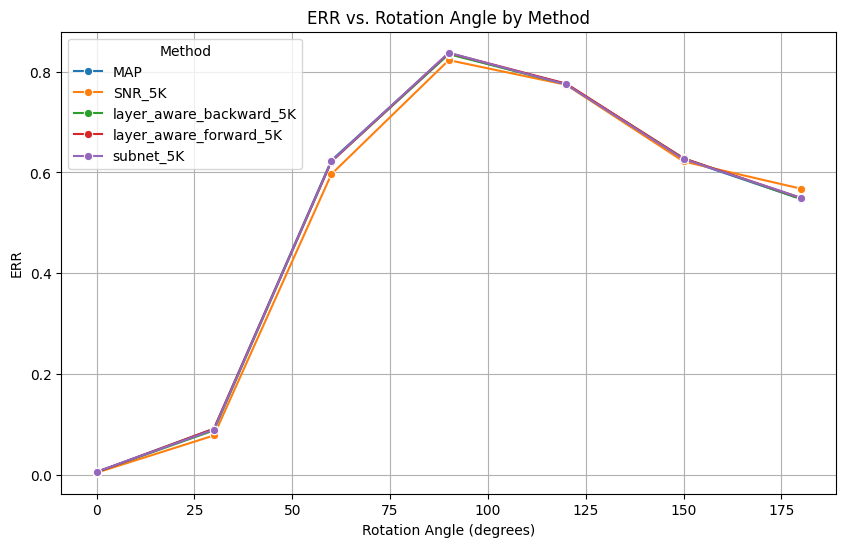

In [4]:
values = 'err'

pivot_table= df.pivot_table(
    index='method',     
    columns='rotation', 
    values=values        
)

# Print the pivot table
pivot_table['AVG_SCORE'] = pivot_table.mean(axis=1)

# Print the updated pivot table
display(pivot_table.sort_values('AVG_SCORE'))

create_plot(pivot_table.drop('AVG_SCORE', axis=1), error_metric='err')

### Likelihood

rotation,0,30,60,90,120,150,180,AVG_SCORE
method,,,,,,,,
layer_aware_backward_5K,-0.017679,-0.283406,-2.917468,-5.115682,-5.551659,-5.179980,-5.658020,-3.531985
subnet_5K,-0.018696,-0.287285,-2.928040,-5.109302,-5.557508,-5.172565,-5.653650,-3.532435
layer_aware_forward_5K,-0.018342,-0.285453,-2.924297,-5.115124,-5.566109,-5.177584,-5.654265,-3.534453
MAP,-0.017919,-0.317241,-3.433685,-6.069594,-6.582309,-6.086036,-6.643351,-4.164305
SNR_5K,-0.011950,-0.258289,-3.152569,-6.008784,-6.544500,-6.514849,-7.103821,-4.227823


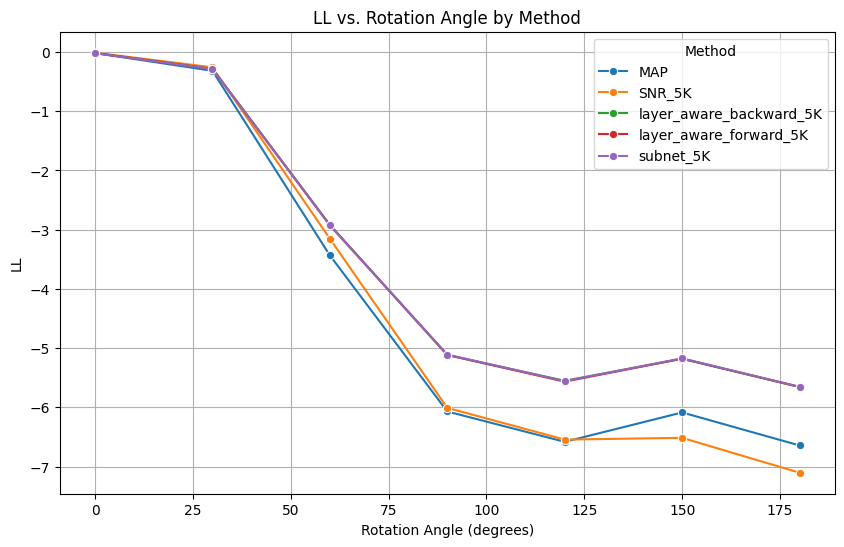

In [5]:
values = 'll'

pivot_table= df.pivot_table(
    index='method',     
    columns='rotation', 
    values=values        
)

# Print the pivot table
pivot_table['AVG_SCORE'] = pivot_table.mean(axis=1)

# Print the updated pivot table
display(pivot_table.sort_values('AVG_SCORE', ascending=False))

create_plot(pivot_table.drop('AVG_SCORE', axis=1), error_metric=values)

### Brier

rotation,0,30,60,90,120,150,180,AVG_SCORE
method,,,,,,,,
layer_aware_backward_5K,0.008741,0.133934,0.987078,1.343130,1.260057,1.036106,0.951313,0.817194
subnet_5K,0.009396,0.135897,0.989387,1.341395,1.259401,1.034078,0.951744,0.817328
layer_aware_forward_5K,0.009002,0.135956,0.989925,1.342688,1.260633,1.033997,0.952816,0.817860
SNR_5K,0.006397,0.120266,0.969588,1.365752,1.307925,1.092286,1.026638,0.841265
MAP,0.008828,0.142648,1.032552,1.399243,1.305964,1.066793,0.972940,0.846996


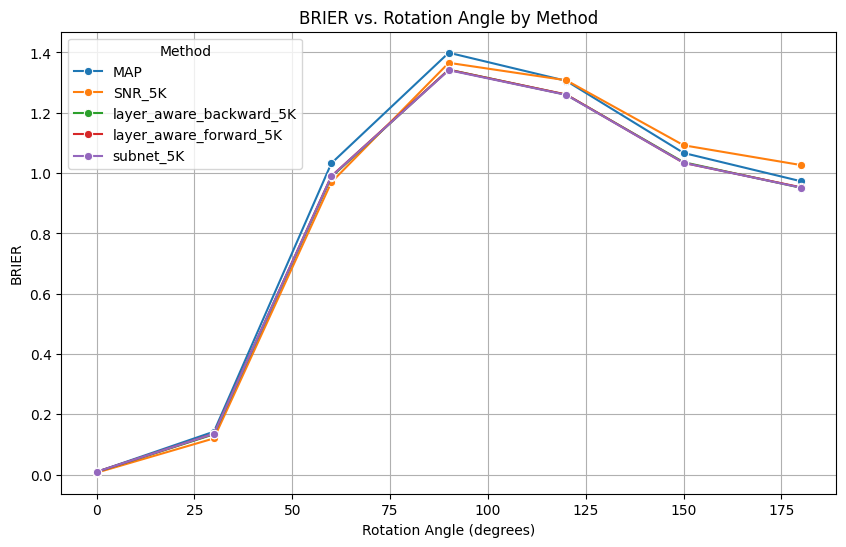

In [6]:
values = 'brier'

pivot_table= df.pivot_table(
    index='method',     
    columns='rotation', 
    values=values        
)

# Print the pivot table
pivot_table['AVG_SCORE'] = pivot_table.mean(axis=1)

# Print the updated pivot table
display(pivot_table.sort_values('AVG_SCORE'))

create_plot(pivot_table.drop('AVG_SCORE', axis=1), error_metric=values)

### ECE

rotation,0,30,60,90,120,150,180,AVG_SCORE
method,,,,,,,,
layer_aware_backward_5K,0.002015,0.022936,0.421727,0.597693,0.554094,0.448364,0.423780,0.352944
subnet_5K,0.002031,0.025795,0.422582,0.599124,0.552398,0.446793,0.426492,0.353602
layer_aware_forward_5K,0.001945,0.027165,0.420578,0.599487,0.557018,0.448460,0.425072,0.354246
SNR_5K,0.000796,0.028345,0.421445,0.621968,0.597163,0.503755,0.482644,0.379445
MAP,0.001297,0.039864,0.459178,0.640741,0.593431,0.477981,0.445842,0.379762


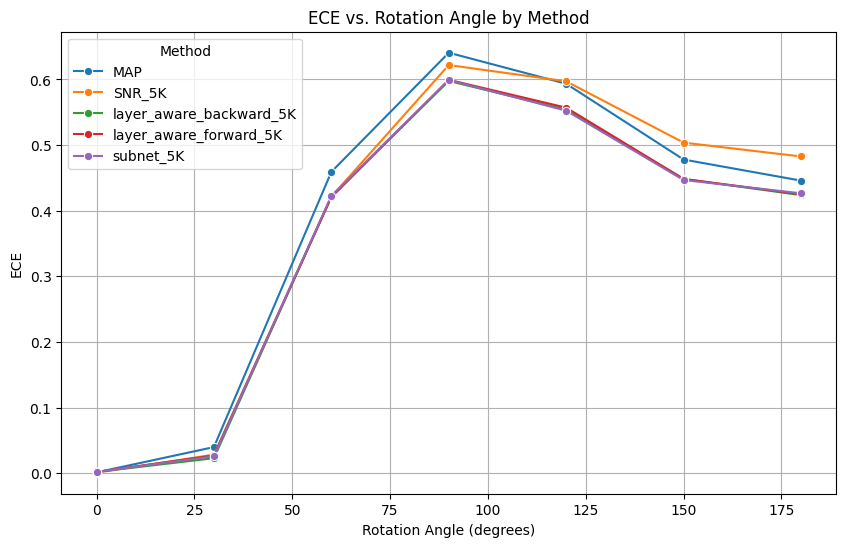

In [7]:
values = 'ece'

pivot_table= df.pivot_table(
    index='method',     
    columns='rotation', 
    values=values        
)

# Print the pivot table
pivot_table['AVG_SCORE'] = pivot_table.mean(axis=1)

# Print the updated pivot table
display(pivot_table.sort_values('AVG_SCORE'))

create_plot(pivot_table.drop('AVG_SCORE', axis=1), error_metric=values)